In [1]:
import sys
import cv2
import numpy as np
import os, fnmatch
import json
import pandas as pd
import openpyxl  
import shutil


import matplotlib.pyplot as plt
import matplotlib.patches as patches

INPUT_PATH = '/home/msaeed3/mehreen/datasets/KHATT/ParagraphImages_v1.0/FixedTextParagraphs/'
DATASETS = ['Train', 'Test', 'Validate']
OUTPUT_DIR = '/home/msaeed3/mehreen/datasets/KHATT/ParagraphImages_v1.0/FixedTextParagraphs/'
xl_file = 'KHATTUnicodeTruthValues-v1.0.xlsx'
GT_PATH = '/home/msaeed3/mehreen/datasets/KHATT/GroundTruth_v1.0/'


INPUT_PATH_LINES = '/home/msaeed3/mehreen/datasets/KHATT/LineImages_v1.0/FixedTextLineImages/'

OUT_JSON_PREFIX = 'khatt_'


In [2]:
def handle_single_para(para_df, output_directory):

    output_data = []

    basename = 'para_' + str(para_df.paragraph_number.loc[0])
    
    all_lines = [line.strip() for line in para_df.ground_truth]
    for line in all_lines:
        output_data.append({"gt": line})

    output_data_path =os.path.join(output_directory, basename, "{}.json".format(basename))
    if not os.path.exists(os.path.dirname(output_data_path)):
        os.makedirs(os.path.dirname(output_data_path))

    with open(output_data_path, 'w') as f:
        json.dump(output_data, f)

    return output_data_path


In [3]:
def process_khaleej_dir():
    df = pd.read_csv(INPUT_PATH+PARA_CSV)
    paragraph_number = df.paragraph_number.to_numpy()
    print('Total paragraphs: ', np.max(paragraph_number))
    
    all_ground_truth = []
    for i in set(paragraph_number):
        
        para_df = df[df.paragraph_number == i]
        para_df = para_df.copy()
        para_df = para_df.reset_index(drop=True)
        img_path = INPUT_PATH + para_df.image_file.iloc[0]
        
        json_path = handle_single_para(para_df, OUTPUT_DIR)       
        all_ground_truth.append([json_path, img_path])
    return all_ground_truth

def main_preprocess():    
    training_output_json = OUTPUT_DIR + TRAIN_OUT_JSON
    validation_output_json = OUTPUT_DIR + VALID_OUT_JSON
    
    all_ground_truth = process_dir()
    all_ground_truth.sort()


    training_list = all_ground_truth[:-1000]
    validation_list = all_ground_truth[-1000:]

    print("Training Size:", len(training_list))
    print("Validation Size:", len(validation_list))

    with open(training_output_json, 'w') as f:
        json.dump(training_list, f)

    with open(validation_output_json, 'w') as f:
        json.dump(validation_list, f)     

In [7]:
FORM_NO_COL = 1
PARA_NO_COL = 2
TOTAL_LINES_COL = 3
CONTENT_COL = 4
IMGFILE_PREFIX = 'AHTD3'

def process_one_image(im, all_lines, output_directory):

    output_data = []

    basename = im[:-4]  # take away .tif
    
    for line in all_lines:
        output_data.append({"gt": line})

    output_data_path =os.path.join(output_directory, basename, "{}.json".format(basename))
    if not os.path.exists(os.path.dirname(output_data_path)):
        os.makedirs(os.path.dirname(output_data_path))

    with open(output_data_path, 'w') as f:
        json.dump(output_data, f)

    return output_data_path


def process_dir(form, para, gt, filename_path, training_output_json):
    all_ground_truth = []
    
    for f, p, g in zip(form, para, gt):
        ljlsdfklfj incorrect way to handle files....look at preprocess_khatt* in py3 dir
        filter_file = IMGFILE_PREFIX + f + '*' + '_Para' + p + '.tif'
        img_files = fnmatch.filter(os.listdir(filename_path), filter_file)
        if len(img_files) == 0:
            print('No files in filter matching', filter_file)
        for im in img_files:
            full_img_name = os.path.join(filename_path, im)
            json_path = process_one_image(im, g, filename_path)
            all_ground_truth.append([json_path, full_img_name]) 
            
    with open(training_output_json, 'w') as f:
        json.dump(all_ground_truth, f)    
        

def read_xl_gt():
    form = []
    para = []
    gt = []
    # Openpyxl indices start from 1 not zero
    workbook = openpyxl.load_workbook(GT_PATH+xl_file, data_only=True)
    sheet = workbook.active
    row = 2
    
    while row <= sheet.max_row:
        tmp = str(sheet.cell(row,FORM_NO_COL).value)
        if tmp != 'None':
            form_no = tmp
        form.append(form_no)
#        print('form no', form_no)
        para_no = str(sheet.cell(row,PARA_NO_COL).value)
        para.append(para_no)
#        print('para', para_no)
        total_lines = int(sheet.cell(row,TOTAL_LINES_COL).value)
        # There are mistakes in xl file
        if form_no == 'A0500' and para_no == '4':
            total_lines = 8
        text_list = []
        for i in range(total_lines):
            text = str(sheet.cell(row+i,CONTENT_COL).value)
            text = text.strip()
            text_list.append(text)
            

        gt.append(text_list)
        row = row + total_lines
        
    return form, para, gt

def main_preprocess_paragraphs():
    form, para, gt = read_xl_gt()
    #for dataset in DATASETS:
    for dataset in ['Validate']:
        filename_path = os.path.join(INPUT_PATH, dataset)
        out_json_file = os.path.join(OUTPUT_DIR, dataset + '.json')
        process_dir(form, para, gt, filename_path, out_json_file)
        return form, para, gt
        


In [8]:
form, para, gt = main_preprocess_paragraphs()# : This will preprocess only paragraph level ground truths
aklsdfjkl

No files in filter matching AHTD3A008*_Para2.tif
No files in filter matching AHTD3A008*_Para3.tif
No files in filter matching AHTD3A0018*_Para1.tif
No files in filter matching AHTD3A0018*_Para2.tif
No files in filter matching AHTD3A0018*_Para3.tif
No files in filter matching AHTD3A0018*_Para4.tif
No files in filter matching AHTD3A0058*_Para1.tif
No files in filter matching AHTD3A0058*_Para2.tif
No files in filter matching AHTD3A0058*_Para3.tif
No files in filter matching AHTD3A0058*_Para4.tif
No files in filter matching AHTD3A0083*_Para1.tif
No files in filter matching AHTD3A0083*_Para2.tif
No files in filter matching AHTD3A0083*_Para3.tif
No files in filter matching AHTD3A0083*_Para4.tif
No files in filter matching AHTD3A0085*_Para1.tif
No files in filter matching AHTD3A0085*_Para2.tif
No files in filter matching AHTD3A0085*_Para3.tif
No files in filter matching AHTD3A0085*_Para4.tif
No files in filter matching AHTD3A0090*_Para1.tif
No files in filter matching AHTD3A0090*_Para2.tif
No

No files in filter matching AHTD3A0449*_Para1.tif
No files in filter matching AHTD3A0449*_Para2.tif
No files in filter matching AHTD3A0449*_Para3.tif
No files in filter matching AHTD3A0449*_Para4.tif
No files in filter matching AHTD3A0450*_Para1.tif
No files in filter matching AHTD3A0450*_Para2.tif
No files in filter matching AHTD3A0450*_Para3.tif
No files in filter matching AHTD3A0450*_Para4.tif
No files in filter matching AHTD3A0451*_Para1.tif
No files in filter matching AHTD3A0451*_Para2.tif
No files in filter matching AHTD3A0451*_Para3.tif
No files in filter matching AHTD3A0451*_Para4.tif
No files in filter matching AHTD3A0452*_Para1.tif
No files in filter matching AHTD3A0452*_Para2.tif
No files in filter matching AHTD3A0452*_Para3.tif
No files in filter matching AHTD3A0452*_Para4.tif
No files in filter matching AHTD3A0453*_Para1.tif
No files in filter matching AHTD3A0453*_Para2.tif
No files in filter matching AHTD3A0453*_Para3.tif
No files in filter matching AHTD3A0453*_Para4.tif


No files in filter matching AHTD3A0645*_Para2.tif
No files in filter matching AHTD3A0645*_Para3.tif
No files in filter matching AHTD3A0645*_Para4.tif
No files in filter matching AHTD3A0646
*_Para1.tif
No files in filter matching AHTD3A0646
*_Para2.tif
No files in filter matching AHTD3A0646
*_Para3.tif
No files in filter matching AHTD3A0646
*_Para4.tif
No files in filter matching AHTD3A0647
*_Para1.tif
No files in filter matching AHTD3A0647
*_Para2.tif
No files in filter matching AHTD3A0647
*_Para3.tif
No files in filter matching AHTD3A0647
*_Para4.tif
No files in filter matching AHTD3A0648
*_Para1.tif
No files in filter matching AHTD3A0648
*_Para2.tif
No files in filter matching AHTD3A0648
*_Para3.tif
No files in filter matching AHTD3A0648
*_Para4.tif
No files in filter matching AHTD3A0649*_Para1.tif
No files in filter matching AHTD3A0649*_Para2.tif
No files in filter matching AHTD3A0649*_Para3.tif
No files in filter matching AHTD3A0649*_Para4.tif
No files in filter matching AHTD3A0650

No files in filter matching AHTD3A0827*_Para3.tif
No files in filter matching AHTD3A0827*_Para4.tif
No files in filter matching AHTD3A0829
*_Para1.tif
No files in filter matching AHTD3A0829
*_Para2.tif
No files in filter matching AHTD3A0829
*_Para3.tif
No files in filter matching AHTD3A0829
*_Para4.tif
No files in filter matching AHTD3A0830*_Para1.tif
No files in filter matching AHTD3A0830*_Para2.tif
No files in filter matching AHTD3A0830*_Para3.tif
No files in filter matching AHTD3A0830*_Para4.tif
No files in filter matching AHTD3A0831*_Para1.tif
No files in filter matching AHTD3A0831*_Para2.tif
No files in filter matching AHTD3A0831*_Para3.tif
No files in filter matching AHTD3A0831*_Para4.tif
No files in filter matching AHTD3A0833*_Para1.tif
No files in filter matching AHTD3A0833*_Para2.tif
No files in filter matching AHTD3A0833*_Para3.tif
No files in filter matching AHTD3A0833*_Para4.tif
No files in filter matching AHTD3A0834*_Para1.tif
No files in filter matching AHTD3A0834*_Para2.

No files in filter matching AHTD3A1022*_Para2.tif
No files in filter matching AHTD3A1022*_Para3.tif
No files in filter matching AHTD3A1022*_Para4.tif
No files in filter matching AHTD3A1023*_Para1.tif
No files in filter matching AHTD3A1023*_Para2.tif
No files in filter matching AHTD3A1023*_Para3.tif
No files in filter matching AHTD3A1023*_Para4.tif
No files in filter matching AHTD3A1025*_Para1.tif
No files in filter matching AHTD3A1025*_Para2.tif
No files in filter matching AHTD3A1025*_Para3.tif
No files in filter matching AHTD3A1025*_Para4.tif
No files in filter matching AHTD3A1026*_Para1.tif
No files in filter matching AHTD3A1026*_Para2.tif
No files in filter matching AHTD3A1026*_Para3.tif
No files in filter matching AHTD3A1026*_Para4.tif
No files in filter matching AHTD3A1027*_Para1.tif
No files in filter matching AHTD3A1027*_Para2.tif
No files in filter matching AHTD3A1027*_Para3.tif
No files in filter matching AHTD3A1027*_Para4.tif
No files in filter matching AHTD3A1028*_Para1.tif


NameError: name 'aklsdfjkl' is not defined

In [9]:
form, para, gt = read_xl_gt()

In [10]:
form

['A008',
 'A008',
 'A008',
 'A008',
 'A0018',
 'A0018',
 'A0018',
 'A0018',
 'A0058',
 'A0058',
 'A0058',
 'A0058',
 'A0083',
 'A0083',
 'A0083',
 'A0083',
 'A0085',
 'A0085',
 'A0085',
 'A0085',
 'A0090',
 'A0090',
 'A0090',
 'A0090',
 'A0100',
 'A0100',
 'A0100',
 'A0100',
 'A0101',
 'A0101',
 'A0101',
 'A0101',
 'A0104',
 'A0104',
 'A0104',
 'A0104',
 'A0119',
 'A0119',
 'A0119',
 'A0119',
 'A0121',
 'A0121',
 'A0121',
 'A0121',
 'A0123',
 'A0123',
 'A0123',
 'A0123',
 'A0124',
 'A0124',
 'A0124',
 'A0124',
 'A0126',
 'A0126',
 'A0126',
 'A0126',
 'A0131',
 'A0131',
 'A0131',
 'A0131',
 'A0132',
 'A0132',
 'A0132',
 'A0132',
 'A0136',
 'A0136',
 'A0136',
 'A0136',
 'A0137',
 'A0137',
 'A0137',
 'A0137',
 'A0140',
 'A0140',
 'A0140',
 'A0140',
 'A0142',
 'A0142',
 'A0142',
 'A0142',
 'A0148',
 'A0148',
 'A0148',
 'A0148',
 'A0149',
 'A0149',
 'A0149',
 'A0149',
 'A0150',
 'A0150',
 'A0150',
 'A0150',
 'A0154',
 'A0154',
 'A0154',
 'A0154',
 'A0155',
 'A0155',
 'A0155',
 'A0155',
 'A0

In [ ]:
def process_one_image(im, all_lines, output_directory):

    output_data = []

    basename = im[:-4]  # take away .tif
    
    for line in all_lines:
        output_data.append({"gt": line})

    output_data_path =os.path.join(output_directory, basename, "{}.json".format(basename))
    if not os.path.exists(os.path.dirname(output_data_path)):
        os.makedirs(os.path.dirname(output_data_path))

    with open(output_data_path, 'w') as f:
        json.dump(output_data, f)

    return output_data_path
        
def process_one_line_image(im, all_lines, output_directory):

    output_data = []

    basename = im[:-4]  # take away .tif
    line_number = int(basename[-1])
    if line_number > len(all_lines):
        print('......', im, all_lines, output_directory, 'line number', line_number, 
              'total lines', len(all_lines))
        return None
    
    

    output_data_path =os.path.join(output_directory, basename, "{}.json".format(basename))
    out_dir = os.path.dirname(output_data_path)
    
    # full image path in new directory
    full_im_path = os.path.join(out_dir, im)
    
    if not os.path.exists(os.path.dirname(output_data_path)):
        os.makedirs(os.path.dirname(output_data_path))

    output_data.append({"gt": all_lines[line_number-1], 
                        "hw_path": full_im_path})    
        
    with open(output_data_path, 'w') as f:
        json.dump(output_data, f)
    # copy image
    shutil.copy(os.path.join(output_directory, im), full_im_path)

    return output_data_path
                
        

def process_line_dir(form, para, gt, filename_path, training_output_json):
    all_ground_truth = []
    
    for f, p, g in zip(form, para, gt):
        filter_file = IMGFILE_PREFIX + f + '*' + '_Para' + p + '_' + '*' + '.tif'
        img_files = fnmatch.filter(os.listdir(filename_path), filter_file)
        for im in img_files:
            full_img_name = os.path.join(filename_path, im)
            json_path = process_one_line_image(im, g, filename_path)
            if json_path is not None:
                all_ground_truth.append([json_path, full_img_name]) 
            
    with open(training_output_json, 'w') as f:
        json.dump(all_ground_truth, f)            
        

def process_line_images():
    form, para, gt = read_xl_gt()
    for dataset in DATASETS:
    #for dataset in ['Validate']:
        filename_path = os.path.join(INPUT_PATH_LINES, dataset)
        out_json_file = os.path.join(INPUT_PATH_LINES, dataset + '.json')
        process_line_dir(form, para, gt, filename_path, out_json_file)    
    
 

In [ ]:

# For the line image directory
#print('processing lines')
#process_line_images()   

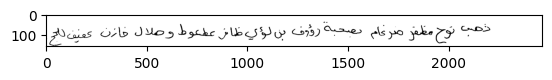

In [68]:
im = cv2.imread('/home/msaeed3/mehreen/datasets/KHATT/LineImages_v1.0/FixedTextLineImages/Train/' + 'AHTD3A0058_Para1_1.tif')

plt.imshow(im)
plt.show()

In [61]:
directory = '/home/msaeed3/mehreen/datasets/KHATT/GroundTruth_v1.0/FixedTextUnicodeTruthValues-v1.0'
db = 'Training'
filename = 'AHTD3A0058_Para1_1.txt'
txtfile = os.path.join(directory, db, filename)
f = open(txtfile, "rb")
#File = open('av.txt', 'w',encoding='utf-8')
strm = f.read()
print(strm)

b'\xd0\xe5\xc8 \xe4\xe6\xcd \xe3\xd9\xdd\xd1 \xd6\xd1\xdb\xc7\xe3 \xc8\xd5\xcd\xc8\xc9 \xd1\xc4\xe6\xdd \xc8\xe4 \xe1\xc4\xed \xd9\xc7\xdd\xd1 \xda\xd8\xda\xe6\xd8 \xe6\xe5\xe1\xc7\xe1 \xce\xc7\xd2\xe4 \xda\xdd\xed\xdd \xe1\xe1\xcd\xcc .'


In [67]:
strm.decode('cp1256')

'ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي ظافر عطعوط وهلال خازن عفيف للحج .'

In [ ]:
def main_create_csv(datasets_to_process):
    df = pd.DataFrame(columns=['image_file', 'ground_truth'])
    form, para, gt = read_xl_gt()
    for dataset in datasets_to_process:
        filename_path = os.path.join(INPUT_PATH, dataset)
        all_ground_truth = []

        for f, p, g in zip(form, para, gt):
            filter_file = IMGFILE_PREFIX + f + '*' + '_Para' + p + '.tif'
            img_files = fnmatch.filter(os.listdir(filename_path), filter_file)
            for im in img_files:
                full_img_name = os.path.join(filename_path, im)
                dat = {'image_file': [full_img_name], 'ground_truth':[g]}
                df = df.append(pd.DataFrame.from_dict(dat), ignore_index=True)
    return df

def create_dfs():
    train_df = main_create_csv(['Train'])
    train_df.to_csv(INPUT_PATH + 'Train.csv')
    train_df = main_create_csv(['Validate'])
    train_df.to_csv(INPUT_PATH + 'Validate.csv')
    train_df = main_create_csv(['Test'])
    train_df.to_csv(INPUT_PATH + 'Test.csv')

create_dfs()    

In [ ]:
train_df.ground_truth.loc[0][0]